In [2]:
import numpy as np
import pandas as pd

In [145]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [146]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [148]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
train_ans = train["Survived"]
train_ans.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [150]:
train = train.drop("Survived", axis = 1)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
all_data = pd.concat([train, test])
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [152]:
sex_map = {"male": 0, "female": 1}
all_data["Sex"] = all_data["Sex"].map(sex_map)
all_data["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [153]:
"""all_data["Age"] = all_data["Age"].fillna(all_data["Age"].mean())
all_data.isnull().sum()"""

'all_data["Age"] = all_data["Age"].fillna(all_data["Age"].mean())\nall_data.isnull().sum()'

In [154]:
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].mean())

In [155]:
port_map = {"S":0, "C":1, "Q":2}
all_data["Embarked"] = all_data["Embarked"].map(port_map)
all_data["Embarked"] = all_data["Embarked"].fillna(all_data["Embarked"].mean())
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [156]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [157]:
len(all_data.index)

1309

In [158]:
all_data = all_data.drop("Cabin", axis = 1)
all_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [159]:
all_data.loc[:,["Age"]].max()

Age    80.0
dtype: float64

In [160]:
all_data.loc[:,["Age"]].min()

Age    0.17
dtype: float64

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [163]:
all_data = pd.concat([all_data, all_data["Name"].str.split(",", expand = True)], axis = 1).drop("Name", axis = 1)
all_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0,1
0,1,3,0,22.0,1,0,A/5 21171,7.2500,0.0,Braund,Mr. Owen Harris
1,2,1,1,38.0,1,0,PC 17599,71.2833,1.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Heikkinen,Miss. Laina
3,4,1,1,35.0,1,0,113803,53.1000,0.0,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,3,0,35.0,0,0,373450,8.0500,0.0,Allen,Mr. William Henry


In [164]:
all_data = all_data.drop(0, axis = 1)
all_data = all_data.rename(columns = {1 : "Name"})
all_data = pd.concat([all_data, all_data["Name"].str.split(".", expand = True)], axis = 1).drop("Name", axis = 1)
all_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0,1,2
0,1,3,0,22.0,1,0,A/5 21171,7.2500,0.0,Mr,Owen Harris,None
1,2,1,1,38.0,1,0,PC 17599,71.2833,1.0,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,Laina,None
3,4,1,1,35.0,1,0,113803,53.1000,0.0,Mrs,Jacques Heath (Lily May Peel),None
4,5,3,0,35.0,0,0,373450,8.0500,0.0,Mr,William Henry,None


In [165]:
all_data = all_data.drop([1,2], axis = 1)
all_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
0,1,3,0,22.0,1,0,A/5 21171,7.2500,0.0,Mr
1,2,1,1,38.0,1,0,PC 17599,71.2833,1.0,Mrs
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss
3,4,1,1,35.0,1,0,113803,53.1000,0.0,Mrs
4,5,3,0,35.0,0,0,373450,8.0500,0.0,Mr


In [166]:
all_data = all_data.rename(columns = {0:"Name"})
all_data_1 = all_data.dropna(subset = ["Age"])
all_data_1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Name           0
dtype: int64

In [167]:
df_1 = pd.DataFrame(all_data.groupby("Name")["PassengerId"].count())
df_1

,PassengerId
Name,
Capt,1
Col,4
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1
Major,2
Master,61


In [168]:
df_2 = pd.DataFrame(all_data.groupby("Name")["Age"].sum())
df_2

,Age
Name,
Capt,70.00
Col,216.00
Don,40.00
Dona,39.00
Dr,305.00
Jonkheer,38.00
Lady,48.00
Major,97.00
Master,290.58


In [169]:
df_3 = pd.concat([df_1, df_2], axis = 1)
df_3["mean"] = df_3["Age"] / df_3["PassengerId"]
df_3

,PassengerId,Age,mean
Name,,,
Capt,1,70.00,70.000000
Col,4,216.00,54.000000
Don,1,40.00,40.000000
Dona,1,39.00,39.000000
Dr,8,305.00,38.125000
Jonkheer,1,38.00,38.000000
Lady,1,48.00,48.000000
Major,2,97.00,48.500000
Master,61,290.58,4.763607


In [170]:
dic = {"Capt":70, "Col":54, "Don":40, "Dona":39, "Dr":38.125, "Jonkheer":38, "Lady":48, "Major":48.5, "Master":4.764
       , "Miss":17.587, "Mlle":24, "Mme":24, "Mr":24.75, "Mrs":31.92, "Ms":14, "Rev":41, "Sir":49, "the Countess":33}

In [171]:
miss = all_data[all_data.isnull().any(axis = 1)]
miss.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name
5,6,3,0,NaN,0,0,330877,8.4583,2.0,Mr
17,18,2,0,NaN,0,0,244373,13.0000,0.0,Mr
19,20,3,1,NaN,0,0,2649,7.2250,1.0,Mrs
26,27,3,0,NaN,0,0,2631,7.2250,1.0,Mr
28,29,3,1,NaN,0,0,330959,7.8792,2.0,Miss


In [172]:
dic

{'Capt': 70,
 'Col': 54,
 'Don': 40,
 'Dona': 39,
 'Dr': 38.125,
 'Jonkheer': 38,
 'Lady': 48,
 'Major': 48.5,
 'Master': 4.764,
 'Miss': 17.587,
 'Mlle': 24,
 'Mme': 24,
 'Mr': 24.75,
 'Mrs': 31.92,
 'Ms': 14,
 'Rev': 41,
 'Sir': 49,
 'the Countess': 33}

In [173]:
miss.groupby("Name")["PassengerId"].count()

Name
 Dr          1
 Master      8
 Miss       50
 Mr        176
 Mrs        27
 Ms          1
Name: PassengerId, dtype: int64

In [174]:
dic_2 = {" Dr":38.125, " Master": 4.764, " Miss": 17.587, " Mr": 24.75, " Mrs":31.92, " Miss":14}

In [175]:
miss_name = pd.DataFrame(miss["Name"])
miss_name.head()

,Name
5,Mr
17,Mr
19,Mrs
26,Mr
28,Miss


In [176]:
miss_name["Name"] = miss_name["Name"].map(dic_2)
miss_name.head()

,Name
5,24.75
17,24.75
19,31.92
26,24.75
28,14.00


In [177]:
miss = miss.drop("Name", axis = 1)
miss.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,3,0,NaN,0,0,330877,8.4583,2.0
17,18,2,0,NaN,0,0,244373,13.0000,0.0
19,20,3,1,NaN,0,0,2649,7.2250,1.0
26,27,3,0,NaN,0,0,2631,7.2250,1.0
28,29,3,1,NaN,0,0,330959,7.8792,2.0


In [178]:
miss = pd.concat([miss, miss_name], axis = 1)
miss.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name
5,6,3,0,NaN,0,0,330877,8.4583,2.0,24.75
17,18,2,0,NaN,0,0,244373,13.0000,0.0,24.75
19,20,3,1,NaN,0,0,2649,7.2250,1.0,31.92
26,27,3,0,NaN,0,0,2631,7.2250,1.0,24.75
28,29,3,1,NaN,0,0,330959,7.8792,2.0,14.00


In [179]:
miss = miss.drop("Age", axis = 1)
miss = miss.rename(columns = {"Name":"Age"})
miss.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
5,6,3,0,0,0,330877,8.4583,2.0,24.75
17,18,2,0,0,0,244373,13.0000,0.0,24.75
19,20,3,1,0,0,2649,7.2250,1.0,31.92
26,27,3,0,0,0,2631,7.2250,1.0,24.75
28,29,3,1,0,0,330959,7.8792,2.0,14.00


In [180]:
all_data_1 = all_data_1.drop("Name", axis = 1)
all_data_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,38.0,1,0,PC 17599,71.2833,1.0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,35.0,1,0,113803,53.1000,0.0
4,5,3,0,35.0,0,0,373450,8.0500,0.0


In [181]:
all_data_2 = pd.concat([all_data_1, miss], axis = 0)
all_data_2.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,0.0,7.2500,0,1,3,0,1,A/5 21171
1,38.0,1.0,71.2833,0,2,1,1,1,PC 17599
2,26.0,0.0,7.9250,0,3,3,1,0,STON/O2. 3101282
3,35.0,0.0,53.1000,0,4,1,1,1,113803
4,35.0,0.0,8.0500,0,5,3,0,0,373450


In [182]:
all_data_2 = all_data_2.drop("Ticket", axis = 1)

In [183]:
all_data_2 = all_data_2.sort_values("PassengerId")
all_data_2.head(6)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,22.00,0.0,7.2500,0,1,3,0,1
1,38.00,1.0,71.2833,0,2,1,1,1
2,26.00,0.0,7.9250,0,3,3,1,0
3,35.00,0.0,53.1000,0,4,1,1,1
4,35.00,0.0,8.0500,0,5,3,0,0
5,24.75,2.0,8.4583,0,6,3,0,0


In [184]:
parch = all_data_2["Parch"]
sibsp = all_data_2["SibSp"]
all_data_2["Family"] = pd.DataFrame(parch + sibsp + 1)
all_data_2.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family
0,22.0,0.0,7.2500,0,1,3,0,1,2
1,38.0,1.0,71.2833,0,2,1,1,1,2
2,26.0,0.0,7.9250,0,3,3,1,0,1
3,35.0,0.0,53.1000,0,4,1,1,1,2
4,35.0,0.0,8.0500,0,5,3,0,0,1


In [185]:
train_answer = pd.DataFrame(train_ans)
train_answer.head()

,Survived
0,0
1,1
2,1
3,1
4,0


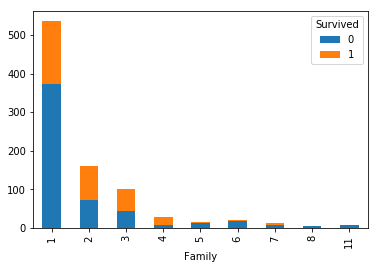

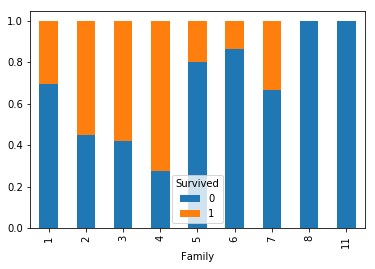

In [186]:
pd.crosstab(all_data_2["Family"][:891], train_answer["Survived"]).plot(kind = "bar", stacked = True)
pd.crosstab(all_data_2["Family"][:891], train_answer["Survived"], normalize = "index").plot(kind = "bar", stacked = True)

In [187]:
all_data_2.loc[all_data_2["Family"] <= 4,"LargeFamily"] = 0
all_data_2.loc[all_data_2["Family"] > 4 ,"LargeFamily"] = 1

In [188]:
range(len(all_data_2))

range(0, 1309)

In [189]:
small = list(all_data_2[(all_data_2.Family <= 4)].index)
n = len(all_data_2[(all_data_2.Family <= 4)].index)
n

1227

In [190]:
all_data_2.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family,LargeFamily
0,22.0,0.0,7.2500,0,1,3,0,1,2,0.0
1,38.0,1.0,71.2833,0,2,1,1,1,2,0.0
2,26.0,0.0,7.9250,0,3,3,1,0,1,0.0
3,35.0,0.0,53.1000,0,4,1,1,1,2,0.0
4,35.0,0.0,8.0500,0,5,3,0,0,1,0.0


In [210]:
df_with_large = all_data_2.drop(["Parch", "SibSp", "Family"], axis = 1)
df_train = df_with_large[:891]
df_test = df_with_large[891:]

In [211]:
df_with_large.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,LargeFamily
0,22.0,0.0,7.2500,1,3,0,0.0
1,38.0,1.0,71.2833,2,1,1,0.0
2,26.0,0.0,7.9250,3,3,1,0.0
3,35.0,0.0,53.1000,4,1,1,0.0
4,35.0,0.0,8.0500,5,3,0,0.0


In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rfc_1.fit(df_train, train_answer)

C:\Users\hkuob\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [215]:
df_test.isnull().sum()

Age            1
Embarked       0
Fare           0
PassengerId    0
Pclass         0
Sex            0
LargeFamily    0
dtype: int64

In [216]:
error = df_test[df_test.isnull().any(axis = 1)]
error

,Age,Embarked,Fare,PassengerId,Pclass,Sex,LargeFamily
88,NaN,2.0,7.75,980,3,1,0.0


In [217]:
df_test.iloc[88] = df_test.iloc[88].fillna(14)

C:\Users\hkuob\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [218]:
df_test.isnull().sum()

Age            0
Embarked       0
Fare           0
PassengerId    0
Pclass         0
Sex            0
LargeFamily    0
dtype: int64

In [219]:
df_test.shape

(418, 7)

In [220]:
prediction = rfc_1.predict(df_test)
prediction.shape

(418,)

In [221]:
PassengerId = np.array(test['PassengerId']).astype(int)
solution = pd.DataFrame(prediction, PassengerId, columns=['Survived'])
solution.to_csv('titanic_ans_2.csv', index_label = ['PassengerId'])